In [1]:
import matplotlib.pyplot as plt
import numpy as np
import logging
import sys
sys.path.insert(0,'..')
import utils
#
import matplotlib
matplotlib.rcParams['mathtext.fontset'] = 'stix'
matplotlib.rcParams['font.family'] = 'STIXGeneral'
matplotlib.rcParams['font.size'] = 25
matplotlib.rcParams['xtick.labelsize'] = 20
matplotlib.rcParams['axes.xmargin'] = 0
#matplotlib.rcParams['axes.ymargin'] = 0
import pickle as pkl
def moving_average(x, w):
    return np.convolve(x, np.ones(w), 'valid') / w

In [2]:
with open(r"vars/logs_1,1,1,1_lr_1e-1_fixed_batch_track_penalty.pickle", "rb") as handle:
    logs_1 = pkl.load(handle)

In [3]:
#entries_to_remove = np.arange(71,200,1)
#for k in entries_to_remove:
#    logs_1.pop(k, None)
#    logs_2.pop(k, None)

In [4]:
#print('Weigths w/o constraints', end=' ')
#print(logs_1[65][4][-1], end=' ')
#print(logs_1[65][5][-1])

In [5]:
# Dictionary composed as
# iteration, X_log, U_log, delta, weights, theta, l(s,a)
steps_1 = logs_1[1][0]
X_log_1 = logs_1[1][1]
delta_1 = np.array(logs_1[1][3], dtype=float).flatten()
weights_1 = np.array(logs_1[1][4], dtype=float).reshape(-1,6)
theta_1 = np.array(logs_1[1][5], dtype=float).reshape(-1,4)
stage_cost_1 = np.array(logs_1[1][6], dtype=float).flatten()

/tmp/ipykernel_115430/2043992104.py:8: DeprecationWarning: setting an array element with a sequence. This was supported in some cases where the elements are arrays with a single element. For example `np.array([1, np.array([2])], dtype=int)`. In the future this will raise the same ValueError as `np.array([1, [2]], dtype=int)`.
  stage_cost_1 = np.array(logs_1[1][6], dtype=float).flatten()


In [6]:
lap_labels = [1] + list(np.arange(5,55,5))
lap_values_1 = []
steps_1 = np.array([])
delta_1 = np.array([])
X_1 = np.array([[0, 0, 0, 0, 0]])
weights_1 = np.array([[1, 0.5, 5, 0, 0, 2]])
theta_1 = np.array([[0, 0, 0, 0]])
stage_cost_1 = np.array([])
#

for key in logs_1.keys():
    if key in lap_labels:
        lap_values_1.append(np.array(logs_1[key][0], dtype=int).flatten()[-1])
    steps_1 = np.concatenate((steps_1, np.array(logs_1[key][0], dtype=int).flatten()))
    X_1 = np.concatenate((X_1, np.array(logs_1[key][1].T, dtype=float).reshape(-1,5)))
    delta_1 = np.concatenate((delta_1, np.array(logs_1[key][3], dtype=float).flatten()))
    weights_1 = np.concatenate((weights_1, np.array(logs_1[key][4], dtype=float).reshape(-1,6)), axis=0)
    theta_1 = np.concatenate((theta_1, np.array(logs_1[key][5], dtype=float).reshape(-1,4)), axis=0)
    stage_cost_1 = np.concatenate((stage_cost_1, np.array(logs_1[key][6], dtype=int).flatten()))
    

/tmp/ipykernel_115430/3860118139.py:19: DeprecationWarning: setting an array element with a sequence. This was supported in some cases where the elements are arrays with a single element. For example `np.array([1, np.array([2])], dtype=int)`. In the future this will raise the same ValueError as `np.array([1, [2]], dtype=int)`.
  stage_cost_1 = np.concatenate((stage_cost_1, np.array(logs_1[key][6], dtype=int).flatten()))


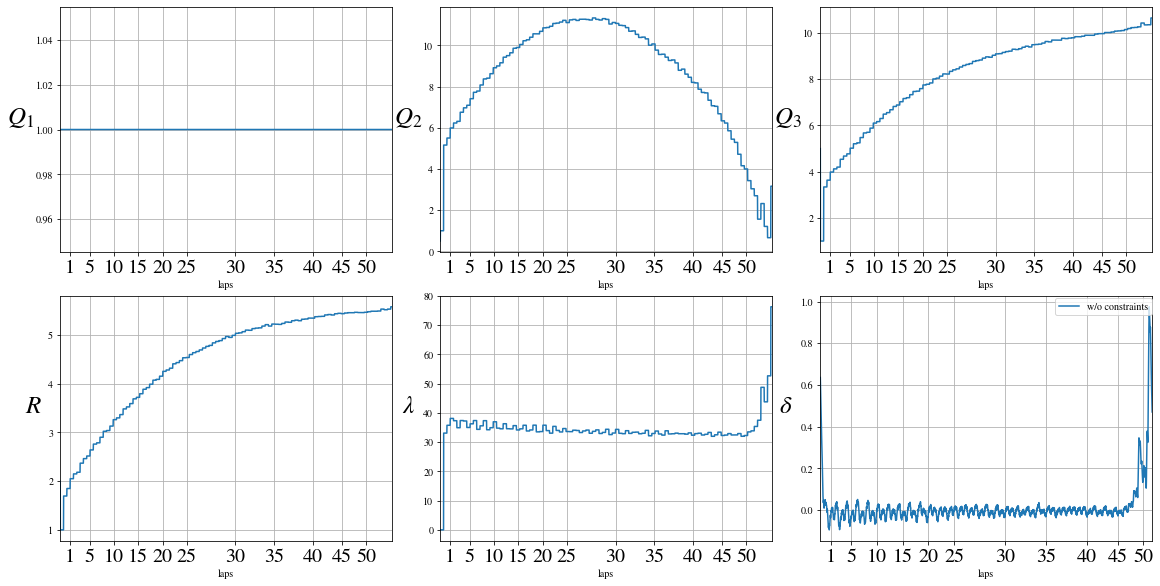

In [7]:
fig, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(2,3,constrained_layout=False, figsize=(16, 8))
ax1.plot(weights_1[:,0], label='w/o constraints')
#ax1.legend()
ax1.set_xlabel('laps')
ax1.set_ylabel('$Q_1$', rotation=0, labelpad=15, fontsize=25)
ax1.set_xticks(lap_values_1)
ax1.set_xticklabels(lap_labels)
ax1.grid(True)

ax2.plot(weights_1[:,1], label='w/o constraints')
#ax2.legend()
ax2.set_xlabel('laps')
ax2.set_ylabel('$Q_2$', rotation=0, labelpad=15, fontsize=25)
ax2.set_xticks(lap_values_1)
ax2.set_xticklabels(lap_labels)
ax2.grid(True)

ax3.plot(weights_1[:,2], label='w/o constraints')
#ax3.legend()
ax3.grid(True)
ax3.set_xlabel('laps')
ax3.set_ylabel('$Q_3$', rotation=0, labelpad=15, fontsize=25)
ax3.set_xticks(lap_values_1)
ax3.set_xticklabels(lap_labels)

ax4.plot(weights_1[:,5], label='w/o constraints')
#ax4.legend()
ax4.grid(True)
ax4.set_xlabel('laps')
ax4.set_ylabel('$R$', rotation=0, labelpad=15, fontsize=25)
ax4.set_xticks(lap_values_1)
ax4.set_xticklabels(lap_labels)

ax5.plot(theta_1[:,0], label='w/o constraints')
#ax1.plot(np.array(theta_vect).reshape(-1,4)[:,1], label=r'$\theta_{V,1}$')
#ax1.plot(np.array(theta_vect).reshape(-1,4)[:,2], label=r'$\theta_{V,2}$')
#ax1.plot(np.array(theta_vect).reshape(-1,4)[:,3], label=r'$\theta_{V,3}$')
#ax5.legend()
ax5.set_xlabel('laps')
ax5.set_ylabel(r'$\lambda$', rotation=0, labelpad=15, fontsize=25)
ax5.set_xticks(lap_values_1)
ax5.set_xticklabels(lap_labels)
ax5.grid(True)

ax6.plot(moving_average(delta_1[30:], 500), label='w/o constraints')
#ax6.legend()
#ax2.plot(np.array(delta_vect).flatten())
ax6.grid(True)
ax6.set_xlabel('laps')
ax6.set_ylabel(r'$\delta$', rotation=0, labelpad=15, fontsize=25)
ax6.set_xticks(lap_values_1)
ax6.set_xticklabels(lap_labels)

handles, labels = ax6.get_legend_handles_labels()
fig.legend(handles, labels, bbox_to_anchor=(1,0.5))

plt.tight_layout(pad=0.2)
#plt.savefig('1,05,5,2_training_params_comparison.eps', format='eps')
plt.show()

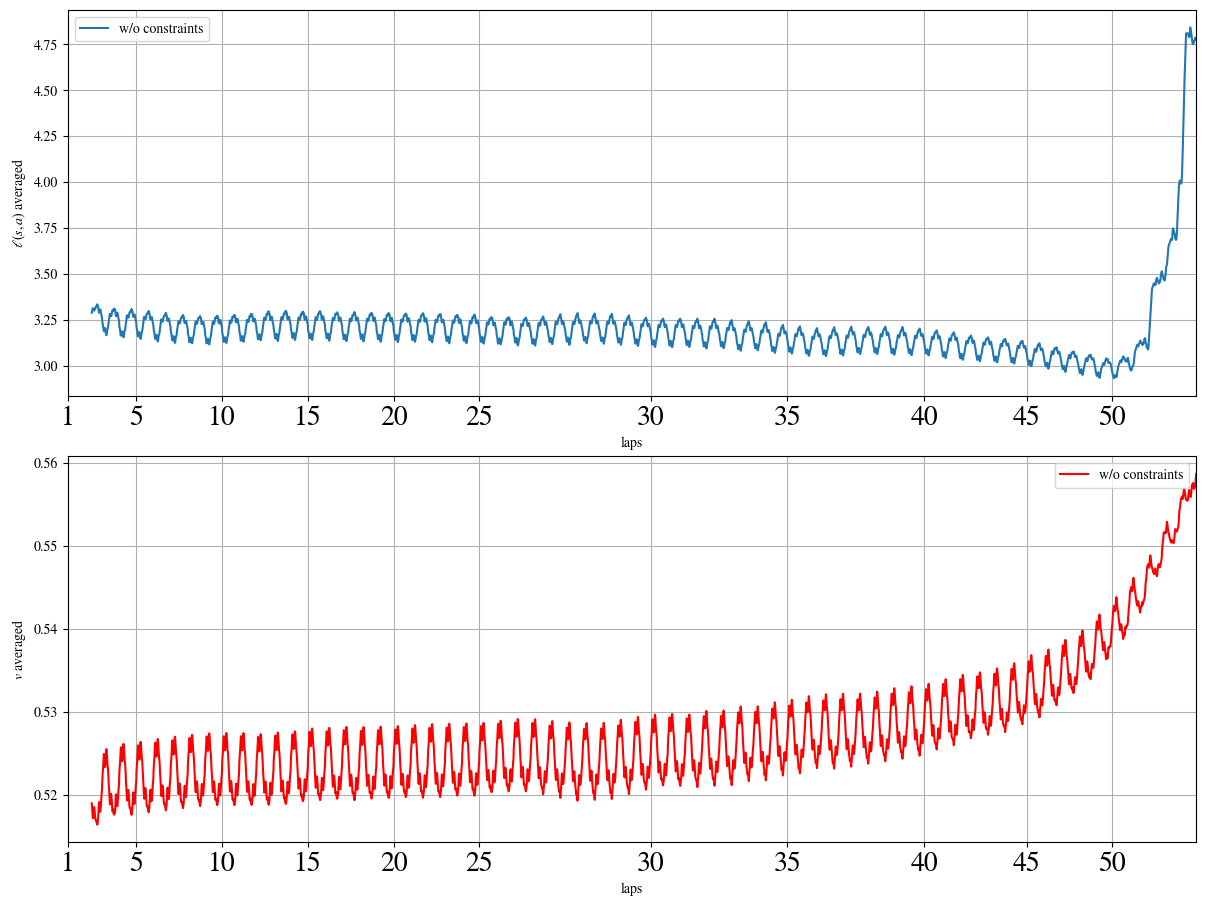

In [8]:
fig, (ax1, ax2) = plt.subplots(2,1, figsize=(12,9), dpi=100)
ax1.plot(steps_1[509:], moving_average(np.array(stage_cost_1[10:]).flatten(), 500), label='w/o constraints')
ax1.set_xticks(lap_values_1)
ax1.set_xticklabels(lap_labels)
ax1.grid(True)
ax1.legend()
ax1.set_xlabel('laps')
ax1.set_ylabel('$\ell(s,a)$ averaged')

ax2.plot(steps_1[509:], moving_average(X_1[11:,3], 500), c='r', label='w/o constraints')
ax2.set_xticks(lap_values_1)
ax2.set_xticklabels(lap_labels)
ax2.grid(True)
ax2.legend()
ax2.set_xlabel('laps')
ax2.set_ylabel('$v$ averaged')


#ax3.plot(steps_1[9:], X_1[10:,3])
#ax3.plot(steps_2[9:], X_2[10:,3])
#ax3.set_xticks(lap_values_1)
#ax3.set_xticklabels(lap_labels)
#ax3.grid(True)
#ax3.set_xlabel('laps')
#ax3.set_ylabel('$v$')

plt.tight_layout(pad=0.5)
#plt.savefig('1,05,5,2_training_speed_comparison.eps', format='eps')
plt.show()

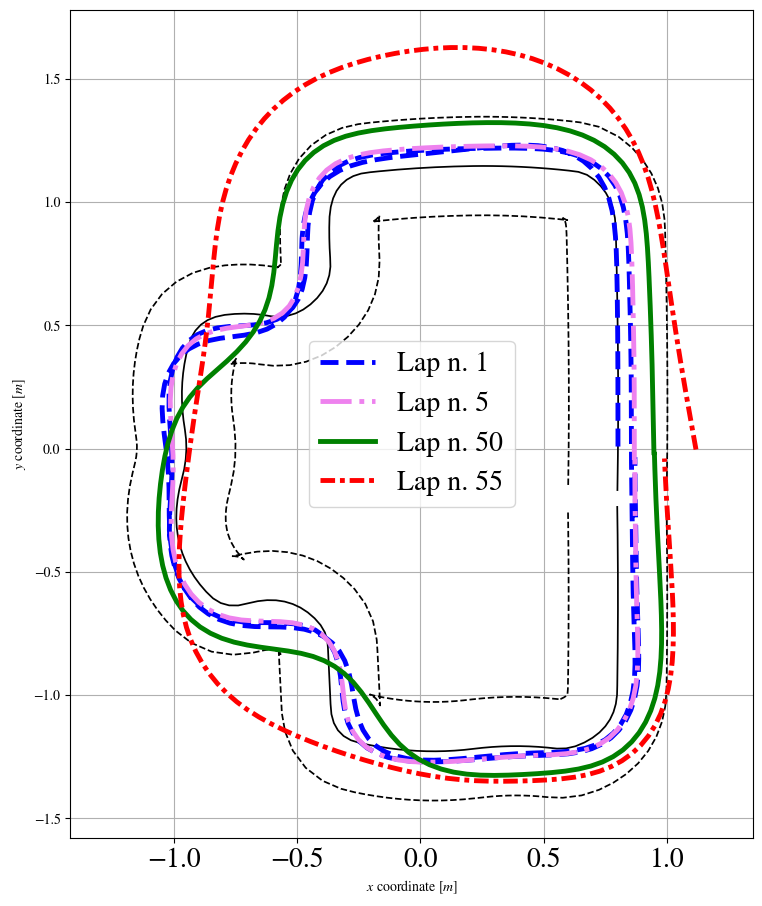

In [12]:
with open(r"vars/trajectory.pickle", "rb") as handle:
    traj = pkl.load(handle)
with open(r"vars/inside.pickle", "rb") as handle:
    inside = pkl.load(handle)
with open(r"vars/outside.pickle", "rb") as handle:
    outside = pkl.load(handle)
    
fig, (ax1) = plt.subplots(1,1, dpi=100, figsize=(12,9))
ax1.plot(traj[:,0], traj[:,1], "k", lw=1.25)
ax1.plot(inside[:,0], inside[:,1], "k--", lw=1.25)
ax1.plot(outside[:,0], outside[:,1], "k--", lw=01.25)
#ax1.text(X_log[0,0], X_log[1,0], 'START')

for i, (key, val) in enumerate(logs_1.items()):
    #print(val[1].shape)
    #ax_dict["A"].plot(val[1][0,:], val[1][1,:], label='Lap n. %i'%(i+1))
    if i==0 or i==4 or i==49 or i==54:
        if i==0:
            c = 'b'
            linestyle = '--'
        elif i==4:
            c = 'violet'
            linestyle = '-.'
        elif i==49:
            c = 'green'
            linestyle = '-'
        elif i==54:
            c = 'r'
            linestyle = (0, (3, 1, 1, 1))
            #lw=2
        ax1.plot(val[1][0,:], val[1][1,:], color=c, linestyle=linestyle, lw=3.5, label='Lap n. %i'%(i+1))


ax1.grid(True)
ax1.margins(x=0.1)
#plt.gca().set_aspect('equal')
#ax1.set_xlim(-1,5,1.5)
ax1.legend(fontsize=20)
ax1.set_aspect('equal')
ax1.set_xlabel('$x$ coordinate [$m$]')
ax1.set_ylabel('$y$ coordinate [$m$]')


plt.tight_layout(pad=0.5)
plt.grid(True)
#plt.savefig('1,05,5,2_training_laps_comparison.eps', format='eps')
plt.show()